<a href="https://colab.research.google.com/github/MichalRozenwald/epiCausality/blob/main/pangenomes_dimelo_main_brunch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
# Lets Colab access your Google drive
try:
    from google.colab import drive
except:
    print("""
You don't seem to be running on Google Colab so this cell is not going to be useful for you.
Make sure you are running you notebook in a conda environment set up as per README.md.
Once you have this notebook running in a correctly configured environment, proceed to the rest of the cells.
          """)
else:
    drive.mount('/content/drive')
    # Install condacolab to let us get the modkit dependency
    !pip install -q condacolab
    import condacolab
    condacolab.install()
    # Install modkit
    !conda install nanoporetech::modkit==0.2.4
    # Clone the repo, change the active path to be inside the repo, and install the package
    !rm -r dimelo
    !git clone -b modkit_parsing_main   https://github.com/streetslab/dimelo
    # !git clone -b   modkit_parsing_beta https://github.com/streetslab/dimelo

    import os
    os.chdir('dimelo')
    !pip install ipywidgets==7.7.1 .


Mounted at /content/drive
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...
Channels:
 - conda-forge
 - nanoporetech
Platform: linux-64
Solving environment: / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - nanoporetech::modkit==0.2.4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    modkit-0.2.4               |

CPU times: user 3.06 s, sys: 716 ms, total: 3.78 s
Wall time: 2min 58s


# Etracting np.arrays of the ROI from the Pangenome data - HG00408_Nanopore_1

https://www-ncbi-nlm-nih-gov.libproxy.berkeley.edu/geo/query/acc.cgi?acc=GSM649703

# Build the same type of CG unit vectors for PUBLIC PANGENOME human  the  - lymphoblast


A lymphoblast is a modified naive lymphocyte with altered cell morphology. It occurs when the lymphocyte is activated by an antigen and increased in volume by nucleus and cytoplasm growth as well as new mRNA and protein synthesis. The lymphoblast then starts dividing two to four times every 24 hours for three to five days, with a single lymphoblast making approximately 1000 clones of its original naive lymphocyte, with each clone sharing the originally unique antigen specificity. Finally the dividing cells differentiate into effector cells, known as plasma cells (for B cells), cytotoxic T cells, and helper T cells.[1]

Channel 1
Source name	lymphoblast cell line DNA [test]
Organism	Homo sapiens
Characteristics	gender: Female
cell line: lymphoblast cell line HG00408
ethnicity: Han Chinese from South China (1000 Genomes code: CHS)
Biomaterial provider	Coriell cell line HG00408
http://ccr.coriell.org/Sections/Search/Search.aspx?PgId=165&q=HG00408
Extracted molecule	genomic DNA
Extraction protocol	DNA was extracted from lymphoblast cell lines by Coriell Repositories (http://ccr.coriell.org/)
Label	Cy3
Label protocol	250 ng of genomic DNA (unsonicated) was labeled by Klenow using random priming with Cy3/Cy5 nonamers (for test and reference samples, respectively) using Nimblegen labelling kit but with the following changes: reagents were scaled to the smaller amount of input DNA and with DNA labeling occurring overnight.

https://www-ncbi-nlm-nih-gov.libproxy.berkeley.edu/geo/query/acc.cgi?acc=GSM649703



* Original data from PanGemones AWS: https://s3-us-west-2.amazonaws.com/human-pangenomics/index.html?prefix=working/HPRC/HG00408/raw_data/nanopore/guppy_6/
* Than Aligned to the t2t v.1.1 by Oberon >> extracted using the new dimelo package branch dimelo "modkit_parsing_main" extracting .h5 files
https://github.com/streetslab/dimelo/tree/modkit_parsing_main


In [1]:
from dimelo import parse_bam, plot_enrichment_profile, plot_reads
import matplotlib.pyplot as plt
from pathlib import Path

modkit found with expected version 0.2.4


In [7]:
! ls "/content/drive/MyDrive/Michal Rozenwald/data/pangenome"

pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5
pangenomes_dimelo_main_brunch.ipynb


In [5]:
pangenome_dir = "/content/drive/MyDrive/Michal Rozenwald/data/pangenome"

In [6]:
pan_nanopore_file_name = "pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5"
pan_nanopore_file_name

'pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5'

In [8]:
nanopore_outpath = Path(pangenome_dir, pan_nanopore_file_name)
nanopore_outpath

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5')

In [12]:
bed_region = Path(pangenome_dir, "ROI_chr1_206586162_206586192_regions.merged.bed")
bed_region

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/ROI_chr1_206586162_206586192_regions.merged.bed')

In [15]:
from dimelo import parse_bam, plot_enrichment_profile, plot_reads
# plot_reads.plot_reads()

Loading regions from ROI_chr1_206586162_206586192_regions.merged.bed using even 4000bp windows in either direction from bed region centers.
Writing new bed file ROI_chr1_206586162_206586192_regions.merged.windowed4000-for-readout.bed


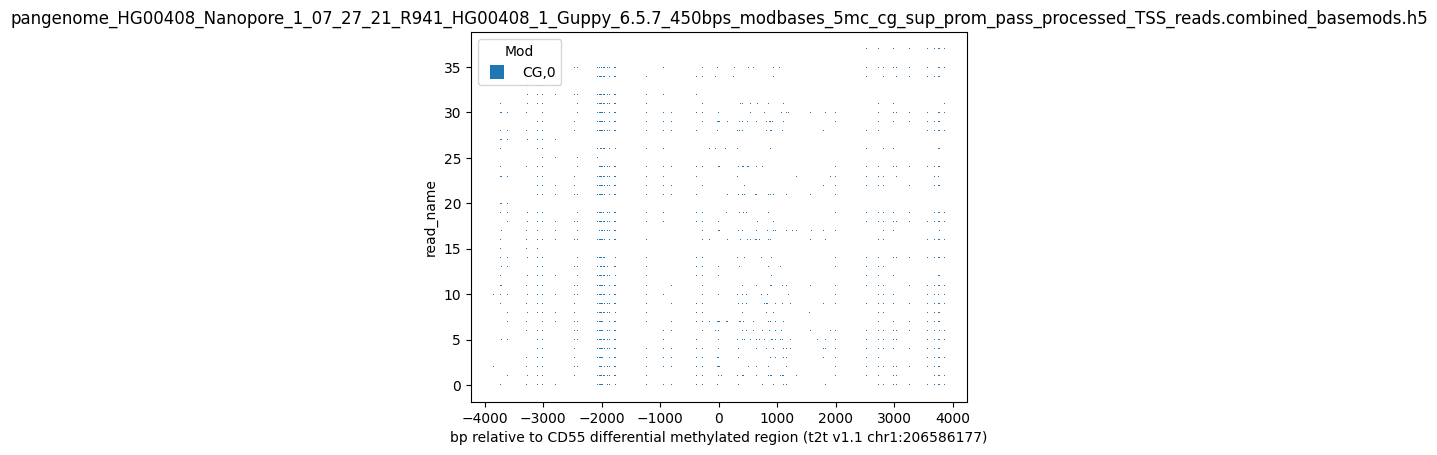

In [17]:
plot_reads.plot_reads(
    nanopore_outpath,
    bed_region, # "chr1:206586162-206586192", #bed_region,
    ['CG,0'],
    window_size = 4000,
    # s=3
)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title(Path(nanopore_outpath).name)
plt.show()

Loading regions from ROI_chr1_206586162_206586192_regions.merged.bed using even 30bp windows in either direction from bed region centers.
Writing new bed file ROI_chr1_206586162_206586192_regions.merged.windowed30-for-readout.bed


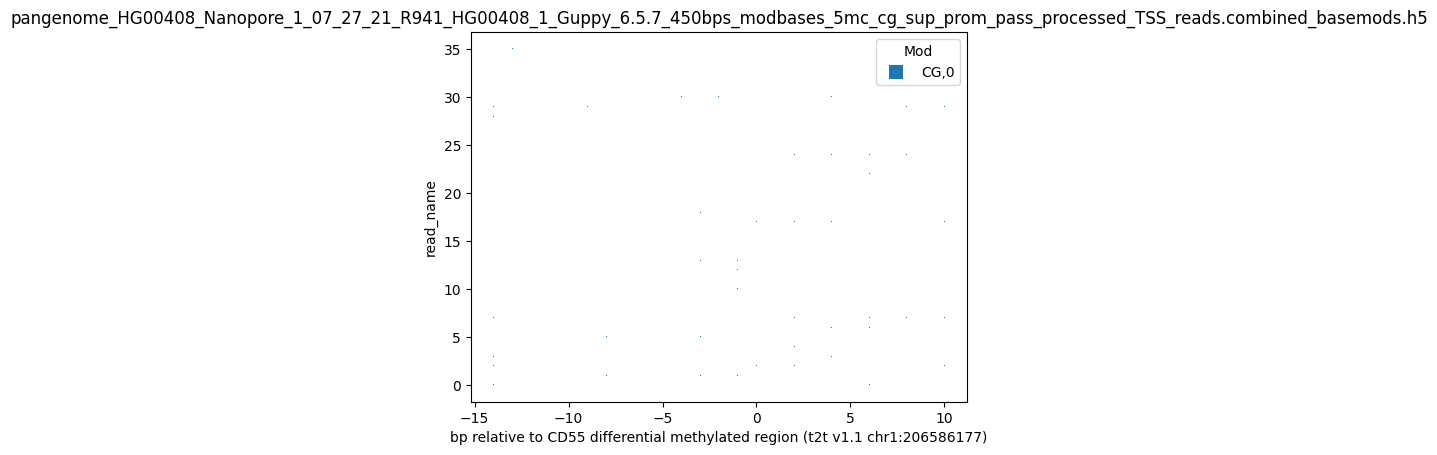

In [21]:
plot_reads.plot_reads(
    nanopore_outpath,
    bed_region, # "chr1:206586162-206586192", #bed_region,
    ['CG,0'],
    window_size = 30, #4000,
    # s=3
)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title(Path(nanopore_outpath).name)
plt.show()

In [24]:
import numpy as np
import pandas as pd

from pathlib import Path

import seaborn as sns
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

from dimelo import parse_bam, plot_enrichment_profile, plot_reads, load_processed


In [22]:
# plot_reads.plot_reads(
mod_file_name = nanopore_outpath
bed_file_name =  bed_region #, # "chr1:206586162-206586192", #bed_region,
mod_names=  ['CG,0']#,
window_size = 4000#,

# s=3

# plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
# plt.title(Path(nanopore_outpath).name)
# plt.show()

Using window size defined by bed file ROI_chr1_206586162_206586192_regions.merged.bed.


<ipython-input-42-81844836b099>:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


<Axes: xlabel='pos', ylabel='read_name'>

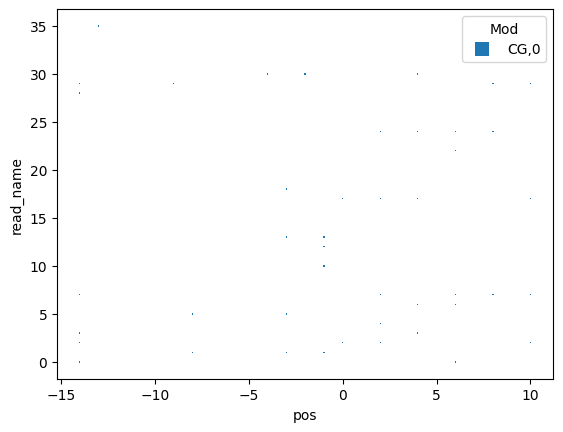

In [42]:
reads, read_names, mods = load_processed.reads_from_hdf5(
              file=mod_file_name,
              bed_file=bed_file_name,
              mod_names=mod_names,
              window_size=None, #window_size,
          )

# Convert data frame where each row represents a read to a data frame where each row represents a single modified position in a read
df = pd.DataFrame({
    'read_name': read_names,
    'mod': mods,
    'pos': reads
}).explode('pos')
axes = sns.scatterplot(
    data=df,
    x="pos",
    y="read_name",
    hue="mod",
    # palette=colors,
    s=1, #0.5,
    marker="s",
    linewidth=0,
)
# Retrieve the existing legend
legend = axes.legend_

# Update legend properties
if legend is not None:
    legend.set_title('Mod')
    for handle in legend.legendHandles:
        handle.set_markersize(10)  # Set a larger marker size for legend

# return axes
axes

In [43]:
df

,read_name,mod,pos
0,0,"CG,0",-14
1,0,"CG,0",6
2,1,"CG,0",-8
3,1,"CG,0",-3
4,1,"CG,0",-1
5,2,"CG,0",-14
6,2,"CG,0",0
7,2,"CG,0",2
8,2,"CG,0",10
9,3,"CG,0",-14


In [44]:
df['pos_shifted'] = df['pos'] + 15
df

,read_name,mod,pos,pos_shifted
0,0,"CG,0",-14,1
1,0,"CG,0",6,21
2,1,"CG,0",-8,7
3,1,"CG,0",-3,12
4,1,"CG,0",-1,14
5,2,"CG,0",-14,1
6,2,"CG,0",0,15
7,2,"CG,0",2,17
8,2,"CG,0",10,25
9,3,"CG,0",-14,1


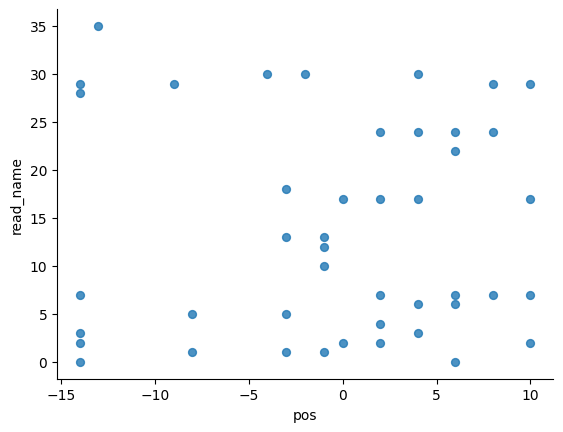

In [47]:
# @title read_name vs pos

from matplotlib import pyplot as plt
df.plot(kind='scatter', y='read_name', x='pos', s=32, alpha=.8)
# df.plot(kind='scatter', x='read_name', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
df.groupby("read_name").count() #["pos"].count()

,mod,pos,pos_shifted
read_name,,,
0,2,2,2
1,3,3,3
2,4,4,4
3,2,2,2
4,1,1,1
5,2,2,2
6,2,2,2
7,5,5,5
10,1,1,1


In [50]:
read_names_unique = np.unique(df['read_name'])
num_reads = len(read_names_unique)
num_reads

19

In [59]:
reads_dict = dict()

for i in range(len(read_names_unique)):
  reads_dict[read_names_unique[i]] = i
reads_dict

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 10: 8,
 12: 9,
 13: 10,
 17: 11,
 18: 12,
 22: 13,
 24: 14,
 28: 15,
 29: 16,
 30: 17,
 35: 18}

### <!!!!> Build padded reads <!!!!>

In [52]:
padded_reads = np.zeros([num_reads, 30])
padded_reads[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
padded_reads.shape

(19, 30)

### SWITCH TO Nans -> to distriguish empty values from unmethylated

In [56]:
padded_reads = padded_reads + np.nan
padded_reads.shape, padded_reads[:2]

((19, 30),
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan]]))

In [60]:
for i in range(len(df['read_name'])):
  # df['pos_shifted']:
  padded_reads[reads_dict[df['read_name'][i]], df['pos_shifted'][i]] = 1
padded_reads

array([[nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,  1.,
        nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  1., nan,  1., nan, nan, nan, nan, nan, nan, nan,  1.,
        nan, nan, nan, nan],
       [nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,  1.,
        nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [61]:
padded_reads[0]

array([nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan, nan])

In [62]:
df[df["read_name"] == 0]

,read_name,mod,pos,pos_shifted
0,0,"CG,0",-14,1
1,0,"CG,0",6,21


In [65]:
padded_reads[:2]

array([[nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,  1.,
        nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan]])

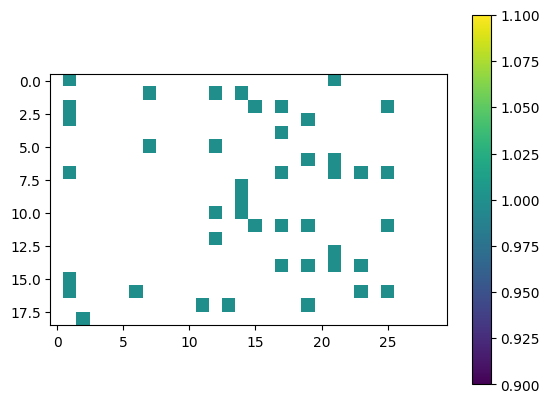

In [66]:
plt.imshow(padded_reads) # np.random.random((50,50)))
plt.colorbar()
plt.show()

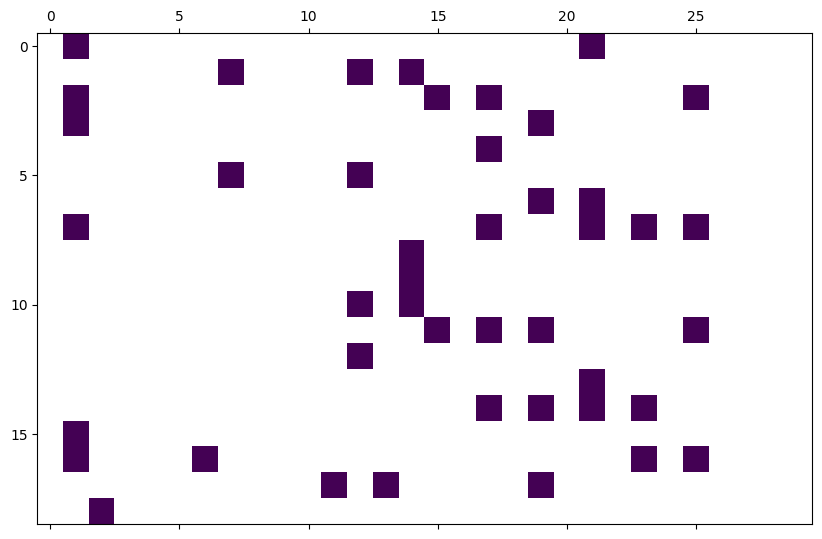

In [67]:
plt.figure(figsize=(10,50))
plt.matshow(padded_reads, fignum=1)


In [68]:
padded_reads_df = pd.DataFrame(padded_reads)
padded_reads_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
seq_list =  ['C',
  'C',
  'G',
  'C',
  'C',
  'C',
  'C',
  'G',
  'A',
  'G',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'A',
  'C']

In [73]:
len(seq_list), seq_list

(30,
 ['C',
  'C',
  'G',
  'C',
  'C',
  'C',
  'C',
  'G',
  'A',
  'G',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'A',
  'C'])

In [74]:
padded_reads_df.columns = seq_list
padded_reads_df

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
padded_reads_df.describe()

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
count,0.0,6.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,5.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
mean,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
min,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
25%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
50%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
75%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
max,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


### Save mC profiles np.ARRAY!

In [77]:
padded_reads.shape, padded_reads

((19, 30),
 array([[nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,  1.,
         nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan,  1., nan,  1., nan, nan, nan, nan, nan, nan, nan,  1.,
         nan, nan, nan, nan],
        [nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,  1.,
         nan, nan, nan, n

In [78]:
!pwd

/content


In [79]:
save_folder_path = "/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads"
save_folder_path

'/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads'

In [80]:
nanopore_outpath

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5')

In [81]:
# cd55_30pbRIO_padded_reads_24Apr16.npy
save_name = "pangenome_HG00408_Nanopore_1_cd55_30pbRIO_padded_reads_24Apr24"
save_name_np = save_name + ".npy"

np.save(Path(save_folder_path, save_name_np), padded_reads)
Path(save_folder_path, save_name_np)

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads/pangenome_HG00408_Nanopore_1_cd55_30pbRIO_padded_reads_24Apr24.npy')

In [82]:
save_name_csv = save_name + ".csv"

padded_reads_df.to_csv(Path(save_folder_path, save_name_csv))
Path(save_folder_path, save_name_np)

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads/pangenome_HG00408_Nanopore_1_cd55_30pbRIO_padded_reads_24Apr24.npy')

# Etracting np.arrays of the ROI from the Pangenome data - HG00408_Nanopore_3
https://www-ncbi-nlm-nih-gov.libproxy.berkeley.edu/geo/query/acc.cgi?acc=GSM649703



* Original data from PanGemones AWS: https://s3-us-west-2.amazonaws.com/human-pangenomics/index.html?prefix=working/HPRC/HG00408/raw_data/nanopore/guppy_6/
* Than Aligned to the t2t v.1.1 by Oberon >> extracted using the new dimelo package branch dimelo "modkit_parsing_main" extracting .h5 files
https://github.com/streetslab/dimelo/tree/modkit_parsing_main


In [84]:
from dimelo import parse_bam, plot_enrichment_profile, plot_reads
import matplotlib.pyplot as plt
from pathlib import Path

In [85]:
! ls "/content/drive/MyDrive/Michal Rozenwald/data/pangenome"

chr1:206586162-206586192.windowed4000-for-readout
pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5
pangenome_HG00408_Nanopore_3_07_27_21_R941_HG00408_3_Guppy_6.5.7_450bps_modbases_5mc_c_reads.combined_basemods.h5
pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5
pangenomes_dimelo_main_brunch.ipynb
ROI_chr1_206586162_206586192_regions.merged.bed
ROI_chr1_206586162_206586192_regions.merged.windowed30-for-readout.bed
ROI_chr1_206586162_206586192_regions.merged.windowed4000-for-readout.bed


In [86]:
pangenome_dir = "/content/drive/MyDrive/Michal Rozenwald/data/pangenome"

In [87]:
pan_nanopore_file_name = "pangenome_HG00408_Nanopore_3_07_27_21_R941_HG00408_3_Guppy_6.5.7_450bps_modbases_5mc_c_reads.combined_basemods.h5" # "pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5"
pan_nanopore_file_name

'pangenome_HG00408_Nanopore_3_07_27_21_R941_HG00408_3_Guppy_6.5.7_450bps_modbases_5mc_c_reads.combined_basemods.h5'

In [88]:
nanopore_outpath = Path(pangenome_dir, pan_nanopore_file_name)
nanopore_outpath

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/pangenome_HG00408_Nanopore_3_07_27_21_R941_HG00408_3_Guppy_6.5.7_450bps_modbases_5mc_c_reads.combined_basemods.h5')

In [89]:
bed_region = Path(pangenome_dir, "ROI_chr1_206586162_206586192_regions.merged.bed")
bed_region

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/ROI_chr1_206586162_206586192_regions.merged.bed')

In [90]:
from dimelo import parse_bam, plot_enrichment_profile, plot_reads
# plot_reads.plot_reads()

Loading regions from ROI_chr1_206586162_206586192_regions.merged.bed using even 4000bp windows in either direction from bed region centers.
Writing new bed file ROI_chr1_206586162_206586192_regions.merged.windowed4000-for-readout.bed


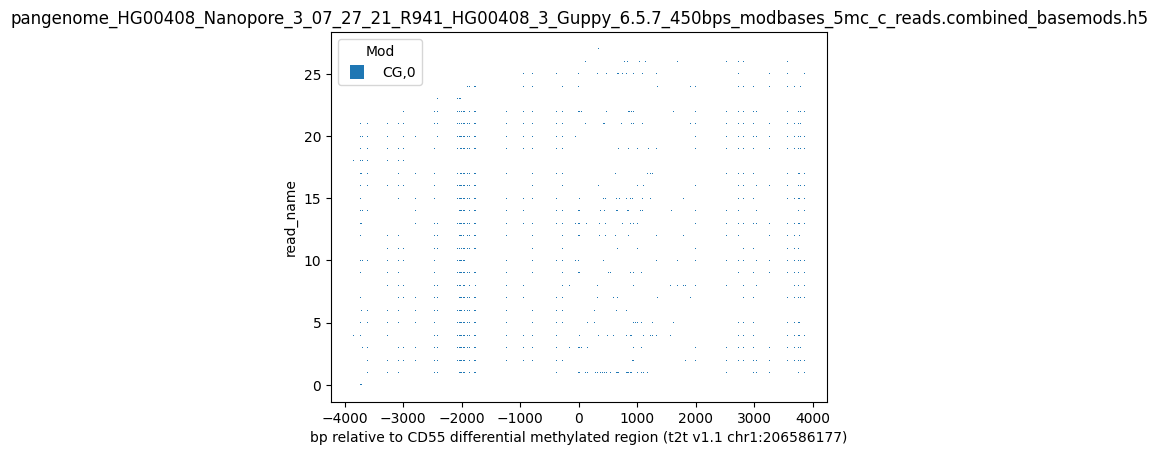

In [91]:
plot_reads.plot_reads(
    nanopore_outpath,
    bed_region, # "chr1:206586162-206586192", #bed_region,
    ['CG,0'],
    window_size = 4000,
    # s=3
)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title(Path(nanopore_outpath).name)
plt.show()

Loading regions from ROI_chr1_206586162_206586192_regions.merged.bed using even 30bp windows in either direction from bed region centers.
Writing new bed file ROI_chr1_206586162_206586192_regions.merged.windowed30-for-readout.bed


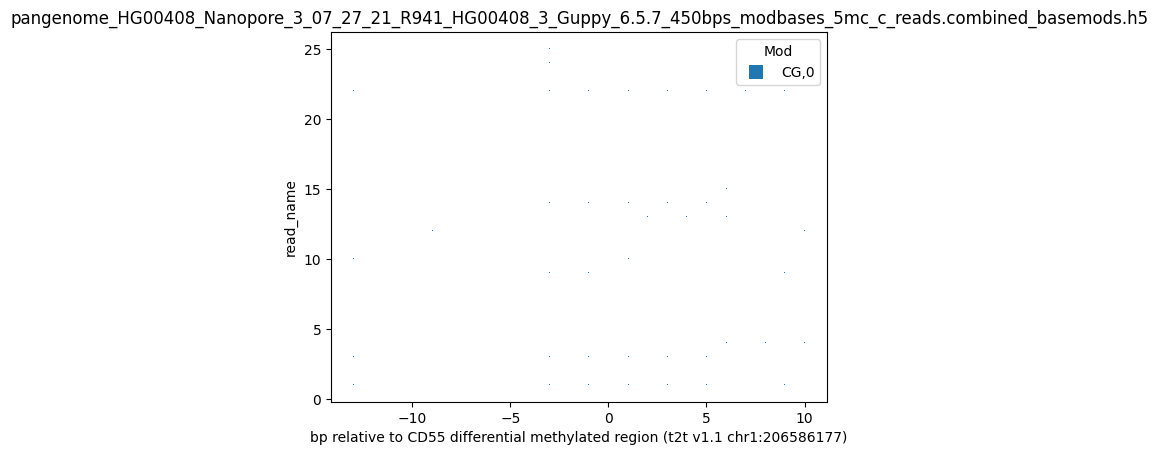

In [92]:
plot_reads.plot_reads(
    nanopore_outpath,
    bed_region, # "chr1:206586162-206586192", #bed_region,
    ['CG,0'],
    window_size = 30, #4000,
    # s=3
)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title(Path(nanopore_outpath).name)
plt.show()

In [93]:
import numpy as np
import pandas as pd

from pathlib import Path

import seaborn as sns
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

from dimelo import parse_bam, plot_enrichment_profile, plot_reads, load_processed


In [94]:
# plot_reads.plot_reads(
mod_file_name = nanopore_outpath
bed_file_name =  bed_region #, # "chr1:206586162-206586192", #bed_region,
mod_names=  ['CG,0']#,
window_size = 4000#,

# s=3

# plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
# plt.title(Path(nanopore_outpath).name)
# plt.show()

Using window size defined by bed file ROI_chr1_206586162_206586192_regions.merged.bed.


<ipython-input-95-81844836b099>:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


<Axes: xlabel='pos', ylabel='read_name'>

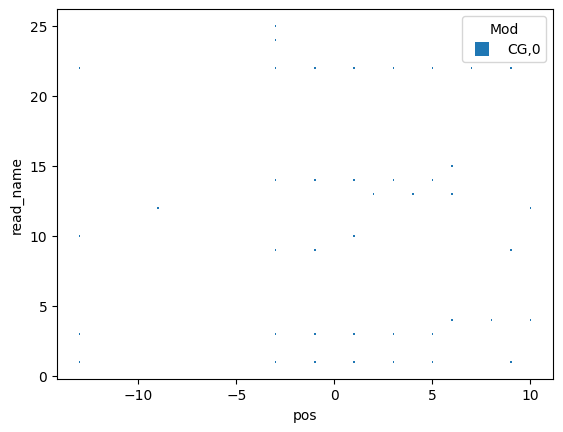

In [95]:
reads, read_names, mods = load_processed.reads_from_hdf5(
              file=mod_file_name,
              bed_file=bed_file_name,
              mod_names=mod_names,
              window_size=None, #window_size,
          )

# Convert data frame where each row represents a read to a data frame where each row represents a single modified position in a read
df = pd.DataFrame({
    'read_name': read_names,
    'mod': mods,
    'pos': reads
}).explode('pos')
axes = sns.scatterplot(
    data=df,
    x="pos",
    y="read_name",
    hue="mod",
    # palette=colors,
    s=1, #0.5,
    marker="s",
    linewidth=0,
)
# Retrieve the existing legend
legend = axes.legend_

# Update legend properties
if legend is not None:
    legend.set_title('Mod')
    for handle in legend.legendHandles:
        handle.set_markersize(10)  # Set a larger marker size for legend

# return axes
axes

In [96]:
df

,read_name,mod,pos
0,1,"CG,0",-13
1,1,"CG,0",-3
2,1,"CG,0",-1
3,1,"CG,0",1
4,1,"CG,0",3
5,1,"CG,0",5
6,1,"CG,0",9
7,3,"CG,0",-13
8,3,"CG,0",-3
9,3,"CG,0",-1


In [97]:
df['pos_shifted'] = df['pos'] + 15
df

,read_name,mod,pos,pos_shifted
0,1,"CG,0",-13,2
1,1,"CG,0",-3,12
2,1,"CG,0",-1,14
3,1,"CG,0",1,16
4,1,"CG,0",3,18
5,1,"CG,0",5,20
6,1,"CG,0",9,24
7,3,"CG,0",-13,2
8,3,"CG,0",-3,12
9,3,"CG,0",-1,14


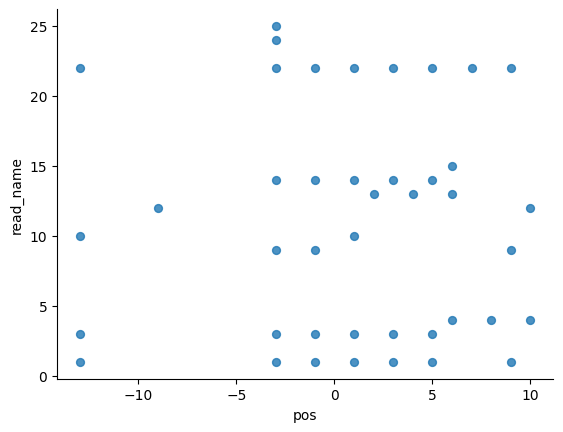

In [98]:
# @title read_name vs pos

from matplotlib import pyplot as plt
df.plot(kind='scatter', y='read_name', x='pos', s=32, alpha=.8)
# df.plot(kind='scatter', x='read_name', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [99]:
df.groupby("read_name").count() #["pos"].count()

,mod,pos,pos_shifted
read_name,,,
1,7,7,7
3,6,6,6
4,3,3,3
9,3,3,3
10,2,2,2
12,2,2,2
13,3,3,3
14,5,5,5
15,1,1,1


In [100]:
read_names_unique = np.unique(df['read_name'])
num_reads = len(read_names_unique)
num_reads

12

In [101]:
reads_dict = dict()

for i in range(len(read_names_unique)):
  reads_dict[read_names_unique[i]] = i
reads_dict

{1: 0,
 3: 1,
 4: 2,
 9: 3,
 10: 4,
 12: 5,
 13: 6,
 14: 7,
 15: 8,
 22: 9,
 24: 10,
 25: 11}

### <!!!!> Build padded reads <!!!!>

In [102]:
padded_reads = np.zeros([num_reads, 30])
padded_reads[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [103]:
padded_reads.shape

(12, 30)

### SWITCH TO Nans -> to distriguish empty values from unmethylated

In [104]:
padded_reads = padded_reads + np.nan
padded_reads.shape, padded_reads[:2]

((12, 30),
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan]]))

In [105]:
for i in range(len(df['read_name'])):
  # df['pos_shifted']:
  padded_reads[reads_dict[df['read_name'][i]], df['pos_shifted'][i]] = 1
padded_reads

array([[nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
        nan,  1., nan,  1., nan,  1., nan,  1., nan, nan, nan,  1., nan,
        nan, nan, nan, nan],
       [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
        nan,  1., nan,  1., nan,  1., nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,  1., nan,  1.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
        nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,
        nan, nan, nan, nan],
       [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [106]:
padded_reads[0]

array([nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
       nan,  1., nan,  1., nan,  1., nan,  1., nan, nan, nan,  1., nan,
       nan, nan, nan, nan])

In [107]:
df[df["read_name"] == 0]

,read_name,mod,pos,pos_shifted


In [108]:
padded_reads[:2]

array([[nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
        nan,  1., nan,  1., nan,  1., nan,  1., nan, nan, nan,  1., nan,
        nan, nan, nan, nan],
       [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
        nan,  1., nan,  1., nan,  1., nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan]])

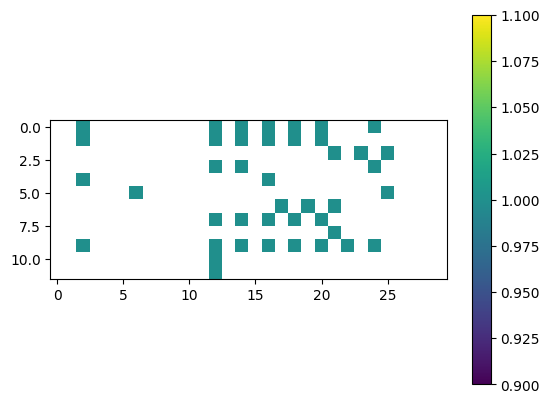

In [109]:
plt.imshow(padded_reads) # np.random.random((50,50)))
plt.colorbar()
plt.show()

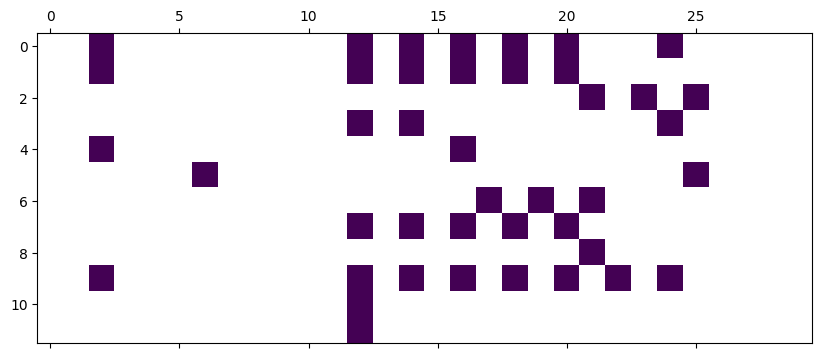

In [110]:
plt.figure(figsize=(10,50))
plt.matshow(padded_reads, fignum=1)


In [111]:
padded_reads_df = pd.DataFrame(padded_reads)
padded_reads_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [112]:
seq_list =  ['C',
  'C',
  'G',
  'C',
  'C',
  'C',
  'C',
  'G',
  'A',
  'G',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'A',
  'C']

In [113]:
len(seq_list), seq_list

(30,
 ['C',
  'C',
  'G',
  'C',
  'C',
  'C',
  'C',
  'G',
  'A',
  'G',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'A',
  'C'])

In [114]:
padded_reads_df.columns = seq_list
padded_reads_df

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [115]:
padded_reads_df.describe()

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
count,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,3.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
max,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


### Save mC profiles np.ARRAY!

In [116]:
padded_reads.shape, padded_reads

((12, 30),
 array([[nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
         nan,  1., nan,  1., nan,  1., nan,  1., nan, nan, nan,  1., nan,
         nan, nan, nan, nan],
        [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
         nan,  1., nan,  1., nan,  1., nan,  1., nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,  1., nan,  1.,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
         nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,
         nan, nan, nan, nan],
        [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
         nan, nan, nan, n

In [117]:
!pwd

/content


In [118]:
save_folder_path = "/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads"
save_folder_path

'/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads'

In [119]:
nanopore_outpath

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/pangenome_HG00408_Nanopore_3_07_27_21_R941_HG00408_3_Guppy_6.5.7_450bps_modbases_5mc_c_reads.combined_basemods.h5')

In [120]:
len(padded_reads)

12

In [121]:
# cd55_30pbRIO_padded_reads_24Apr16.npy
save_name = "pangenome_HG00408_Nanopore_3_cd55_30pbRIO_padded_" + str(len(padded_reads)) + "_reads_24Apr24"
save_name_np = save_name + ".npy"

np.save(Path(save_folder_path, save_name_np), padded_reads)
Path(save_folder_path, save_name_np)

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads/pangenome_HG00408_Nanopore_3_cd55_30pbRIO_padded_12_reads_24Apr24.npy')

In [122]:
save_name_csv = save_name + ".csv"

padded_reads_df.to_csv(Path(save_folder_path, save_name_csv))
Path(save_folder_path, save_name_np)

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads/pangenome_HG00408_Nanopore_3_cd55_30pbRIO_padded_12_reads_24Apr24.npy')

# Etracting np.arrays of the ROI from the Pangenome data - HG00597 idividual Nanopore set 1

##HG00597: B-Lymphocyte
Female
https://catalog.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=HG00597&Product=CC

https://www.cellosaurus.org/CVCL_P969



* Original data from PanGemones AWS:
https://s3-us-west-2.amazonaws.com/human-pangenomics/index.html?prefix=working/HPRC/HG00597/raw_data/nanopore/guppy_6/
* Than Aligned to the t2t v.1.1 by Oberon >> extracted using the new dimelo package branch dimelo "modkit_parsing_main" extracting .h5 files https://github.com/streetslab/dimelo/tree/modkit_parsing_main

pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5

In [123]:
from dimelo import parse_bam, plot_enrichment_profile, plot_reads
import matplotlib.pyplot as plt
from pathlib import Path

In [124]:
! ls "/content/drive/MyDrive/Michal Rozenwald/data/pangenome"

chr1:206586162-206586192.windowed4000-for-readout
pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5
pangenome_HG00408_Nanopore_3_07_27_21_R941_HG00408_3_Guppy_6.5.7_450bps_modbases_5mc_c_reads.combined_basemods.h5
pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5
pangenomes_dimelo_main_brunch.ipynb
ROI_chr1_206586162_206586192_regions.merged.bed
ROI_chr1_206586162_206586192_regions.merged.windowed30-for-readout.bed
ROI_chr1_206586162_206586192_regions.merged.windowed4000-for-readout.bed


In [125]:
pangenome_dir = "/content/drive/MyDrive/Michal Rozenwald/data/pangenome"

In [126]:
pan_nanopore_file_name = "pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5"
#  "pangenome_HG00408_Nanopore_3_07_27_21_R941_HG00408_3_Guppy_6.5.7_450bps_modbases_5mc_c_reads.combined_basemods.h5"
# "pangenome_HG00408_Nanopore_1_07_27_21_R941_HG00408_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5"
pan_nanopore_file_name

'pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5'

In [127]:
nanopore_outpath = Path(pangenome_dir, pan_nanopore_file_name)
nanopore_outpath

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5')

In [128]:
bed_region = Path(pangenome_dir, "ROI_chr1_206586162_206586192_regions.merged.bed")
bed_region

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/ROI_chr1_206586162_206586192_regions.merged.bed')

In [129]:
from dimelo import parse_bam, plot_enrichment_profile, plot_reads
# plot_reads.plot_reads()

Loading regions from ROI_chr1_206586162_206586192_regions.merged.bed using even 4000bp windows in either direction from bed region centers.
Writing new bed file ROI_chr1_206586162_206586192_regions.merged.windowed4000-for-readout.bed


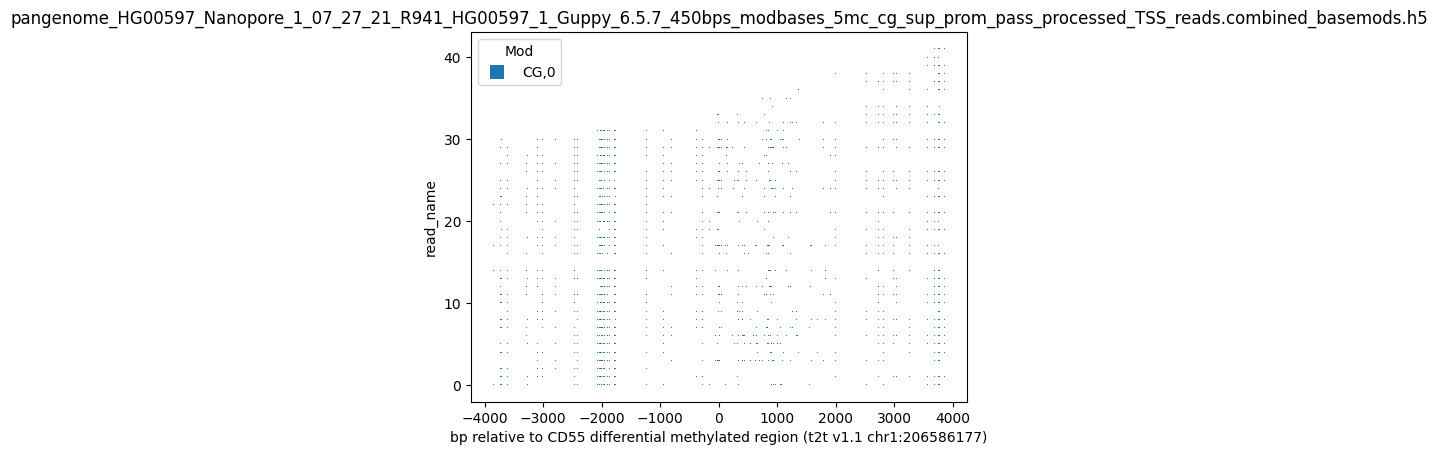

In [130]:
plot_reads.plot_reads(
    nanopore_outpath,
    bed_region, # "chr1:206586162-206586192", #bed_region,
    ['CG,0'],
    window_size = 4000,
    # s=3
)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title(Path(nanopore_outpath).name)
plt.show()

Loading regions from ROI_chr1_206586162_206586192_regions.merged.bed using even 30bp windows in either direction from bed region centers.
Writing new bed file ROI_chr1_206586162_206586192_regions.merged.windowed30-for-readout.bed


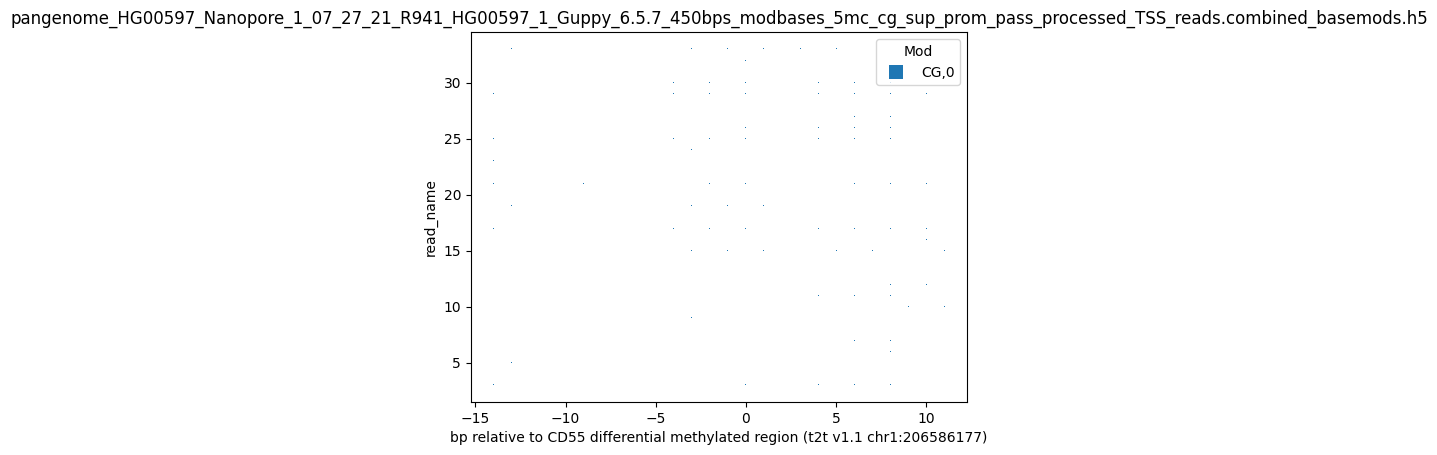

In [131]:
plot_reads.plot_reads(
    nanopore_outpath,
    bed_region, # "chr1:206586162-206586192", #bed_region,
    ['CG,0'],
    window_size = 30, #4000,
    # s=3
)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title(Path(nanopore_outpath).name)
plt.show()

In [132]:
import numpy as np
import pandas as pd

from pathlib import Path

import seaborn as sns
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

from dimelo import parse_bam, plot_enrichment_profile, plot_reads, load_processed


In [133]:
# plot_reads.plot_reads(
mod_file_name = nanopore_outpath
bed_file_name =  bed_region #, # "chr1:206586162-206586192", #bed_region,
mod_names=  ['CG,0']#,
window_size = 4000#,

# s=3

# plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
# plt.title(Path(nanopore_outpath).name)
# plt.show()

Using window size defined by bed file ROI_chr1_206586162_206586192_regions.merged.bed.


<ipython-input-134-81844836b099>:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


<Axes: xlabel='pos', ylabel='read_name'>

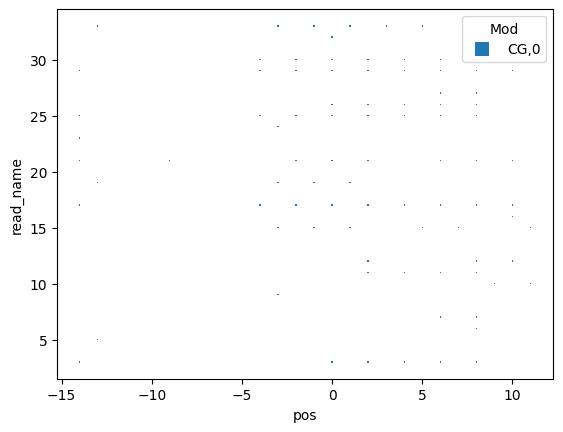

In [134]:
reads, read_names, mods = load_processed.reads_from_hdf5(
              file=mod_file_name,
              bed_file=bed_file_name,
              mod_names=mod_names,
              window_size=None, #window_size,
          )

# Convert data frame where each row represents a read to a data frame where each row represents a single modified position in a read
df = pd.DataFrame({
    'read_name': read_names,
    'mod': mods,
    'pos': reads
}).explode('pos')
axes = sns.scatterplot(
    data=df,
    x="pos",
    y="read_name",
    hue="mod",
    # palette=colors,
    s=1, #0.5,
    marker="s",
    linewidth=0,
)
# Retrieve the existing legend
legend = axes.legend_

# Update legend properties
if legend is not None:
    legend.set_title('Mod')
    for handle in legend.legendHandles:
        handle.set_markersize(10)  # Set a larger marker size for legend

# return axes
axes

In [135]:
df

,read_name,mod,pos
0,3,"CG,0",-14
1,3,"CG,0",0
2,3,"CG,0",2
3,3,"CG,0",4
4,3,"CG,0",6
...,...,...,...
83,33,"CG,0",-3
84,33,"CG,0",-1
85,33,"CG,0",1
86,33,"CG,0",3


In [136]:
df['pos_shifted'] = df['pos'] + 15
df

,read_name,mod,pos,pos_shifted
0,3,"CG,0",-14,1
1,3,"CG,0",0,15
2,3,"CG,0",2,17
3,3,"CG,0",4,19
4,3,"CG,0",6,21
...,...,...,...,...
83,33,"CG,0",-3,12
84,33,"CG,0",-1,14
85,33,"CG,0",1,16
86,33,"CG,0",3,18


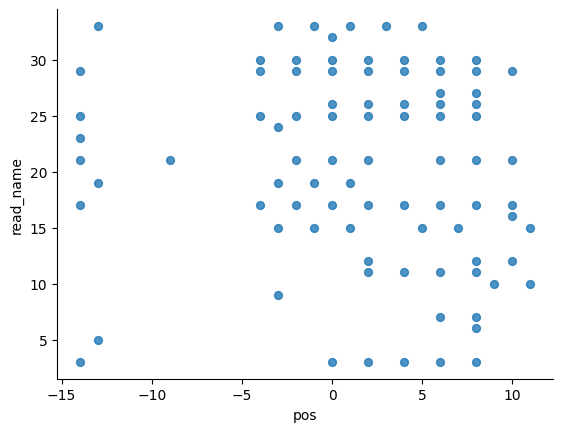

In [137]:
# @title read_name vs pos

from matplotlib import pyplot as plt
df.plot(kind='scatter', y='read_name', x='pos', s=32, alpha=.8)
# df.plot(kind='scatter', x='read_name', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [138]:
df.groupby("read_name").count() #["pos"].count()

,mod,pos,pos_shifted
read_name,,,
3,6,6,6
5,1,1,1
6,1,1,1
7,2,2,2
9,1,1,1
10,2,2,2
11,4,4,4
12,3,3,3
15,6,6,6


In [139]:
read_names_unique = np.unique(df['read_name'])
num_reads = len(read_names_unique)
num_reads

22

In [140]:
reads_dict = dict()

for i in range(len(read_names_unique)):
  reads_dict[read_names_unique[i]] = i
reads_dict

{3: 0,
 5: 1,
 6: 2,
 7: 3,
 9: 4,
 10: 5,
 11: 6,
 12: 7,
 15: 8,
 16: 9,
 17: 10,
 19: 11,
 21: 12,
 23: 13,
 24: 14,
 25: 15,
 26: 16,
 27: 17,
 29: 18,
 30: 19,
 32: 20,
 33: 21}

### <!!!!> Build padded reads <!!!!>

In [141]:
padded_reads = np.zeros([num_reads, 30])
padded_reads[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [142]:
padded_reads.shape

(22, 30)

### SWITCH TO Nans -> to distriguish empty values from unmethylated

In [143]:
padded_reads = padded_reads + np.nan
padded_reads.shape, padded_reads[:2]

((22, 30),
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan]]))

In [144]:
for i in range(len(df['read_name'])):
  # df['pos_shifted']:
  padded_reads[reads_dict[df['read_name'][i]], df['pos_shifted'][i]] = 1
padded_reads

array([[nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  1., nan,  1., nan,  1., nan,  1., nan,  1., nan, nan,
        nan, nan, nan, nan],
       [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,  1., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [145]:
padded_reads[0]

array([nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  1., nan,  1., nan,  1., nan,  1., nan,  1., nan, nan,
       nan, nan, nan, nan])

In [146]:
df[df["read_name"] == 0]

,read_name,mod,pos,pos_shifted


In [147]:
padded_reads[:2]

array([[nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  1., nan,  1., nan,  1., nan,  1., nan,  1., nan, nan,
        nan, nan, nan, nan],
       [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan]])

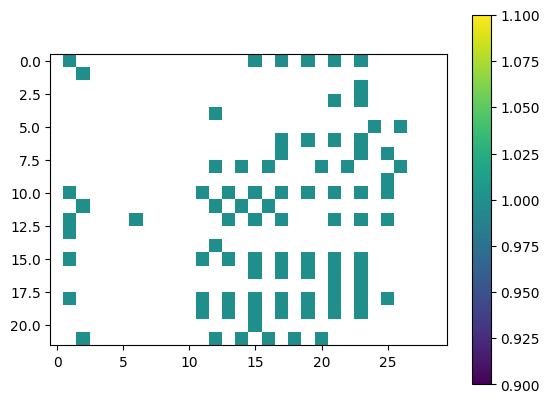

In [148]:
plt.imshow(padded_reads) # np.random.random((50,50)))
plt.colorbar()
plt.show()

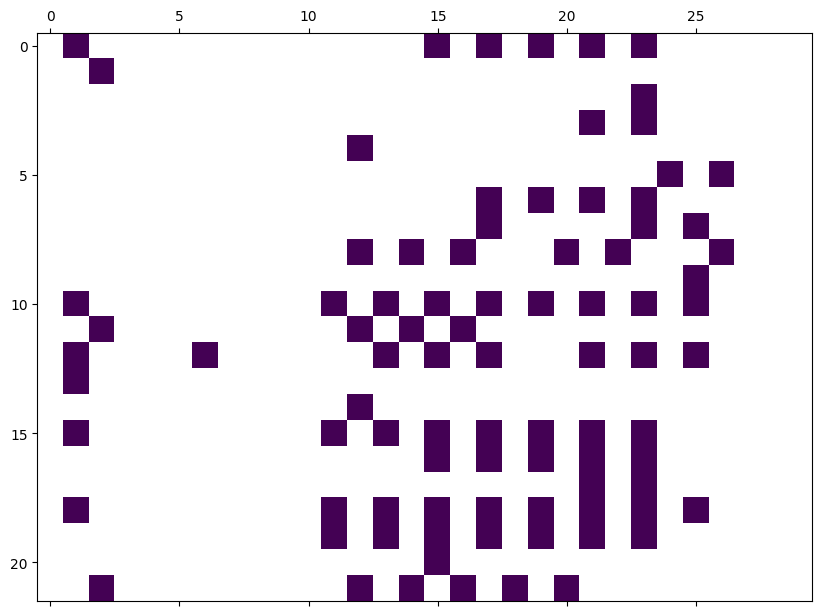

In [149]:
plt.figure(figsize=(10,50))
plt.matshow(padded_reads, fignum=1)


In [150]:
padded_reads_df = pd.DataFrame(padded_reads)
padded_reads_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [151]:
seq_list =  ['C',
  'C',
  'G',
  'C',
  'C',
  'C',
  'C',
  'G',
  'A',
  'G',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'A',
  'C']

In [152]:
len(seq_list), seq_list

(30,
 ['C',
  'C',
  'G',
  'C',
  'C',
  'C',
  'C',
  'G',
  'A',
  'G',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'C',
  'A',
  'C'])

In [153]:
padded_reads_df.columns = seq_list
padded_reads_df

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [154]:
padded_reads_df.describe()

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
count,0.0,6.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,10.0,1.0,12.0,1.0,5.0,2.0,0.0,0.0,0.0
mean,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
std,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN
min,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
25%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
50%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
75%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
max,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


### Save mC profiles np.ARRAY!

In [155]:
padded_reads.shape, padded_reads

((22, 30),
 array([[nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan,  1., nan,  1., nan,  1., nan,  1., nan,  1., nan, nan,
         nan, nan, nan, nan],
        [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,  1., nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, n

In [156]:
!pwd

/content


In [157]:
save_folder_path = "/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads"
save_folder_path

'/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads'

In [158]:
nanopore_outpath

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/pangenome/pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5')

In [ ]:
len(padded_reads)

12

In [159]:
"pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5"

'pangenome_HG00597_Nanopore_1_07_27_21_R941_HG00597_1_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass_processed_TSS_reads.combined_basemods.h5'

In [160]:
# cd55_30pbRIO_padded_reads_24Apr16.npy
save_name = "pangenome_HG00597_Nanopore_1_cd55_30pbRIO_padded_" + str(len(padded_reads)) + "_reads_24Apr24"
save_name_np = save_name + ".npy"

np.save(Path(save_folder_path, save_name_np), padded_reads)
Path(save_folder_path, save_name_np)

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads/pangenome_HG00597_Nanopore_1_cd55_30pbRIO_padded_22_reads_24Apr24.npy')

In [161]:
save_name_csv = save_name + ".csv"

padded_reads_df.to_csv(Path(save_folder_path, save_name_csv))
Path(save_folder_path, save_name_np)

PosixPath('/content/drive/MyDrive/Michal Rozenwald/data/CD55/dimelo/etracted_reads/pangenome_HG00597_Nanopore_1_cd55_30pbRIO_padded_22_reads_24Apr24.npy')

# Alternative ways of extracting data

In [38]:
from pathlib import Path
from collections import defaultdict
import random

import pysam
import numpy as np
import h5py

def read_vectors_from_hdf5(
        file: str | Path,
        motifs: list[str],
        regions: str | Path | list[str | Path] = None,
        window_size: int = None,
        sort_by: str | list[str] = ['chromosome','region_start','read_start'],
        calculate_mod_fractions: bool = True,
) -> (list[tuple],list[str],dict):
    """
    Pulls a list of read data out of an .h5 file containing processed read vectors, formatted
    for read-by-read vector processing downstream use cases.

    Args:
        file: Path to an hdf5 (.h5) file containing modification data for single reads,
            stored in datasets read_name, chromosome, read_start,
            read_end, base modification motif, mod_vector, and val_vector.
        regions: Single or list of Path objects or strings. Path objects must point to .bed
            files, strings can be .bed paths or region string in the format chrX:XXX-XXX.
            All should all be regions for which your original .bam file had reads extracted,
            although by design this method will not raise an error if any region contains
            zero reads, as this may simply be a matter of low read depth.
            If no regions are specified, the entire .h5 file will be returned. This may cause
            memory issues.
        motifs: types of modification to extract data for. Motifs are specified as
            {DNA_sequence},{position_of_modification}. For example, a methylated adenine is specified
            as 'A,0' and CpG methylation is specified as 'CG,0'.
        window_size: An optional parameter for creating centered windows for the provided regions.
            If provided, all regions will be adjusted to be the same size and centered. If not provided,
            all regions should already be the same size, or there should be only one.
        sort_by: Read properties by which to sort, either one string or a list of strings. Options
            include chromosome, region_start, region_end, read_start, read_end, and motif. More to
            be added in future.

    Returns:
        a list of tuples, each tuple containing all datasets corresponding to an individual read that
        was within the specified regions.
        a list of strings, naming the datasets returned.
        a regions_dict, containing lists of (region_start,region_end) coordinates by chromosome/contig.
    """

    with h5py.File(file,'r') as h5:
        datasets = [name for name, obj in h5.items() if isinstance(obj, h5py.Dataset)]

        read_chromosomes = np.array(h5['chromosome'],dtype=str)
        read_starts = np.array(h5['read_start'])
        read_ends = np.array(h5['read_end'])
        read_motifs = np.array(h5['motif'],dtype=str)
        ref_strands = np.array(h5['strand'],dtype=str)

        if regions is not None:
            regions_dict = utils.regions_dict_from_input(
                regions=regions,
                window_size=window_size,
            )
            read_data_list = []
            for chrom,region_list in regions_dict.items():
                for region_start,region_end,region_strand in region_list:
                        relevant_read_indices = np.flatnonzero(
                            (read_ends > region_start) &
                            (read_starts < region_end) &
                            np.isin(read_motifs, motifs) &
                            (read_chromosomes == chrom) &
                            ((region_strand not in ['+', '-'])
                                | (ref_strands == region_strand))
                        )
                        read_data_list += list(zip(
                            *(h5[dataset][relevant_read_indices] for dataset in datasets),
                            [region_start for _ in relevant_read_indices],
                            [region_end for _ in relevant_read_indices],
                        ))
        else:
            regions_dict = None
            relevant_read_indices = np.flatnonzero(
                np.isin(read_motifs, motifs)
            )
            read_data_list = list(zip(
                *(h5[dataset][relevant_read_indices] for dataset in datasets),
                [-1 for _ in relevant_read_indices],
                [-1 for _ in relevant_read_indices]
            ))
    read_data_converted = [convert_tuple_elements(tup) for tup in read_data_list]

    datasets += ['region_start','region_end']
    # We add region information (start and end; chromosome is already present!) so that it is possible to sort by these
    if calculate_mod_fractions:
        # # Add MOTIF_mod_fraction for each unique motif in the read_data_list
        # unique_motifs = np.unique(read_motifs)
        # Add the MOTIF_mod_fraction entries to the datasets list for future reference in sorting
        datasets +=[f'{motif}_mod_fraction' for motif in motifs]
        mod_fractions_by_read_name_by_motif = defaultdict(lambda: defaultdict(lambda: 0.0))
        for motif in motifs:
            for read_data in read_data_converted:
                if read_data[datasets.index('motif')]==motif:
                    mod_sum = np.sum(read_data[datasets.index('mod_vector')])
                    val_sum = np.sum(read_data[datasets.index('val_vector')])
                    mod_fraction = (mod_sum/val_sum if val_sum>0 else 0)
                    mod_fractions_by_read_name_by_motif[read_data[datasets.index('read_name')]][motif]=mod_fraction

        read_data_all = []
        for read_data in read_data_converted:
            read_data_all.append(
                tuple(val for val in read_data)
                +tuple(mod_frac for mod_frac in mod_fractions_by_read_name_by_motif
                [read_data[datasets.index('read_name')]].values()
                    )
                )
    else:
        read_data_all = read_data_converted
    # Enforce that sort_by is a list
    if not isinstance(sort_by,list):
        sort_by = [sort_by]

    # If 'shuffle' appears anywhere in sort_by, we first shuffle the list
    if 'shuffle' in sort_by:
        random.shuffle(read_data_all)

    try:
        sort_by_indices = [datasets.index(sort_item) for sort_item in sort_by if sort_item!='shuffle']
    except ValueError as e:
        raise ValueError(f"Sorting error. {e}. Datasets include {datasets}. If you need mod fraction sorting make sure you are not setting calculate_read_fraction to False.")

    if len(sort_by_indices)>0:
        sorted_read_data = sorted(
            read_data_all,
            key=lambda x: tuple(x[index] for index in sort_by_indices)
            )
    else:
        sorted_read_data = read_data_all

    return sorted_read_data, datasets, regions_dict



def readwise_binary_modification_arrays(
    file: str | Path,
    motifs: list[str],
    regions: str | Path | list[str|Path],
    window_size: int = None,
    sort_by: str | list[str] = ['chromosome','region_start','read_start'],
    thresh: float = None,
    relative: bool = True,
) -> tuple[list[np.ndarray], np.ndarray[int], np.ndarray[str]]:
    """
    Pulls a list of read data out of a file containing processed read vectors, formatted with
    seaborn plotting in mind. Currently we only support .h5 files.

    Args:
        file: Path to an hdf5 (.h5) file containing modification data for single reads,
            stored in datasets read_name, chromosome, read_start,
            read_end, base modification motif, mod_vector, and val_vector.
        regions: Single or list of Path objects or strings. Path objects must point to .bed
            files, strings can be .bed paths or region string in the format chrX:XXX-XXX.
            All should all be regions for which your original .bam file had reads extracted,
            although by design this method will not raise an error if any region contains
            zero reads, as this may simply be a matter of low read depth.
        motifs: types of modification to extract data for. Motifs are specified as
            {DNA_sequence},{position_of_modification}. For example, a methylated adenine is specified
            as 'A,0' and CpG methylation is specified as 'CG,0'.
        window_size: An optional parameter for creating centered windows for the provided regions.
            If provided, all regions will be adjusted to be the same size and centered. If not provided,
            all regions should already be the same size, or there should be only one.
        sort_by: Read properties by which to sort, either one string or a list of strings. Options
            include chromosome, region_start, region_end, read_start, read_end, and motif. More to
            be added in future.
        thresh: A modification calling threshold. If the .h5 is already modification-called, this does
            nothing. If the .h5 files is not modification-called, i.e. its modification data is saved
            as floating point array, thresh must be provided to have valid binary outputs.
        relative: If True, modification coordinates are specified relative to their respective regions
            in the genomes, centered at the center of the region. If False, absolute coordinates are provided.
            There is not currently a check for all reads being on the same chromosome if relative=False, but
            this could create unexpected behaviour for a the standard visualizations.

    Returns:
        Returns a tuple of three arrays, of length (N_READS * len(mod_names)), and a dict of regions.
        The arrays contain the following:
        * positions at which the specified modification was found in a read, after a binary call
        * unique integer ID for the read for each modification position. These integers are ordered
            based on the specified sorting.
        * modification represented by the positions, in the motif format
        The regions_dict contains the following:
        * keys: chromosomes/contigs
        * values: lists of tuples in the format (region_start,region_end)
        For example, if called on a dataset with a single read and two modification types, each array would have two entries. The unique IDs would be the same, as both entries would represent the same single read. The mods and positions would be different, as they would extact different mods.
    """
    file = Path(file)
    if file.suffix=='.h5' or file.suffix=='.hdf5':
        sorted_read_data_converted, datasets, regions_dict = read_vectors_from_hdf5(
            file = file,
            motifs = motifs,
            regions = regions,
            window_size = window_size,
            sort_by = sort_by,
        )
        read_name_index = datasets.index('read_name')
        mod_vector_index = datasets.index('mod_vector')
        motif_index = datasets.index('motif')
        region_start_index = datasets.index('region_start')
        region_end_index = datasets.index('region_end')
        read_start_index = datasets.index('read_start')

        # Check that this .h5 file was created with a threshold, i.e. that the mod calls are binarized
        if thresh is None:
            if not (sorted_read_data_converted[0][mod_vector_index].dtype==np.bool_):
                raise ValueError('No threshold has been applied to this .h5 single read data. You must provide a threshold using the thresh parameter in order to extract binarized modification arrays.')
        else:
            thresh = utils.adjust_threshold(thresh)

        read_ints_list = []
        mod_coords_list = []
        motifs_list = []

        read_names = np.array(
            [read_data[read_name_index]
            for read_data in sorted_read_data_converted]
            )
        # TODO: handle the case where a read shows up in more than one different region
        _, unique_first_indices = np.unique(read_names,return_index=True)
        unique_in_order = read_names[np.sort(unique_first_indices)]
        string_to_int = {read_name: index for index,read_name in enumerate(unique_in_order)}
        # string_to_int = {read_name: index for index, read_name in zip(first_indices,unique_read_names)}
        read_ints = np.array([string_to_int[read_name] for read_name in read_names])
        for read_int,read_data in zip(read_ints,sorted_read_data_converted):
            if thresh is None:
                mod_pos_in_read = np.flatnonzero(read_data[mod_vector_index])
            else:
                mod_pos_in_read = np.flatnonzero(read_data[mod_vector_index]>thresh)

            if relative:
                mod_pos_record = mod_pos_in_read + read_data[read_start_index] - (read_data[region_start_index]+read_data[region_end_index])//2
            else:
                mod_pos_record = mod_pos_in_read + read_data[read_start_index]

            mod_coords_list += list(mod_pos_record)
            read_ints_list += [read_int]*len(mod_pos_record)
            motifs_list += [read_data[motif_index]]*len(mod_pos_record)

        return (np.array(mod_coords_list),np.array(read_ints_list),np.array(motifs_list),regions_dict)

    else:
        raise ValueError(f'File {file} does not have a recognized extension for single read data.')

In [39]:
extract_file = mod_file_name # = nanopore_outpath
regions = bed_file_name # =  bed_region #, # "chr1:206586162-206586192", #bed_region,
mod_names=  ['CG,0']#,
window_size = 4000#,


In [40]:
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

# from . import load_processed
# from . import utils

reads,read_names,mods,regions_dict = readwise_binary_modification_arrays(
    extract_file, # extract_file_no_thresh, # raw modification probabilities
    regions=regions, # t2t_v1_0_cd55_30bp, # cd55_30bps_interest_coords, # ctcf_target_regions,
    motifs=['CG,0'], # 'A,0'],
    sort_by = ['strand'], # 'shuffle',
    window_size=None,
    thresh=0.001, # None,
)

# Convert data frame where each row represents a read to a data frame where each row represents a single modified position in a read
df = pd.DataFrame({
    'read_name': read_names,
    'mod': mods,
    'pos': reads
}).explode('pos')
df

KeyError: "Unable to synchronously open object (object 'strand' doesn't exist)"